# Expert Opinion Survey processing

# Sample code

In [ ]:
library(tidyverse)


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

In [ ]:
likert_levels <- c(
  "Strongly disagree",
  "Disagree",
  "Neither agree nor disagree",
  "Agree",
  "Strongly agree"
)
set.seed(42)
df <-
  tibble(
    q1 = sample(likert_levels, 6, replace = TRUE),
    q2 = sample(likert_levels, 6, replace = TRUE, prob = 5:1),
    q3 = sample(likert_levels, 6, replace = TRUE, prob = 1:5),
    q4 = sample(likert_levels, 6, replace = TRUE, prob = 1:5),
    q5 = sample(c(likert_levels, NA), 6, replace = TRUE),
    q6 = sample(likert_levels, 6, replace = TRUE, prob = c(1, 0, 1, 1, 0))
  ) |>
  mutate(across(everything(), ~ factor(.x, levels = likert_levels)))

likert_levels_dk <- c(
  "Strongly disagree",
  "Disagree",
  "Neither agree nor disagree",
  "Agree",
  "Strongly agree",
  "Don't know"
)
df_dk <-
  tibble(
    q1 = sample(likert_levels_dk, 150, replace = TRUE),
    q2 = sample(likert_levels_dk, 150, replace = TRUE, prob = 6:1),
    q3 = sample(likert_levels_dk, 150, replace = TRUE, prob = 1:6),
    q4 = sample(likert_levels_dk, 150, replace = TRUE, prob = 1:6),
    q5 = sample(c(likert_levels_dk, NA), 150, replace = TRUE),
    q6 = sample(
      likert_levels_dk, 150,
      replace = TRUE, prob = c(1, 0, 1, 1, 0, 1)
    )
  ) |>
  mutate(across(everything(), ~ factor(.x, levels = likert_levels_dk)))


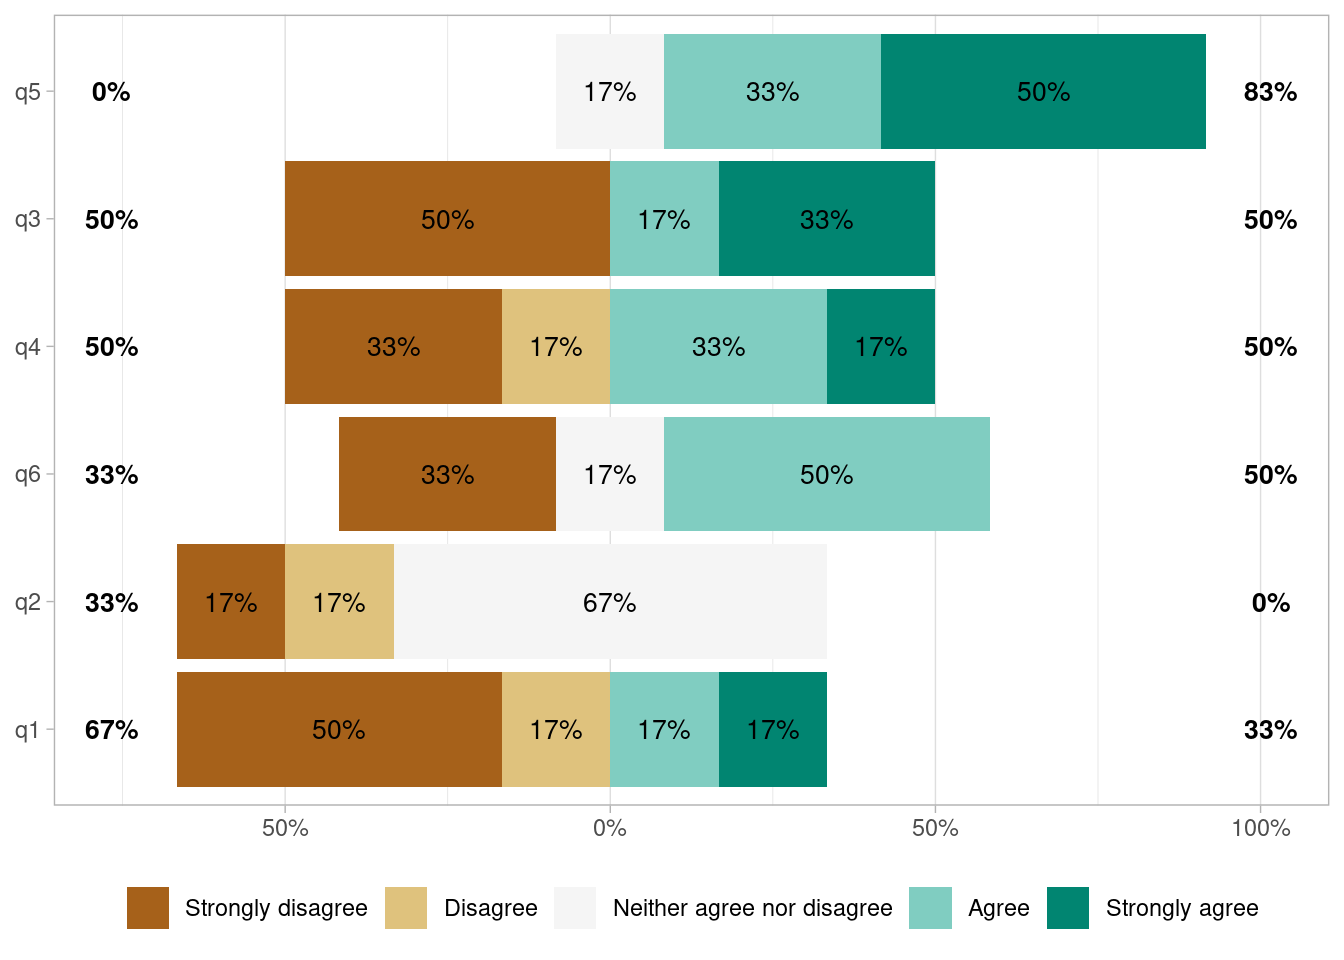

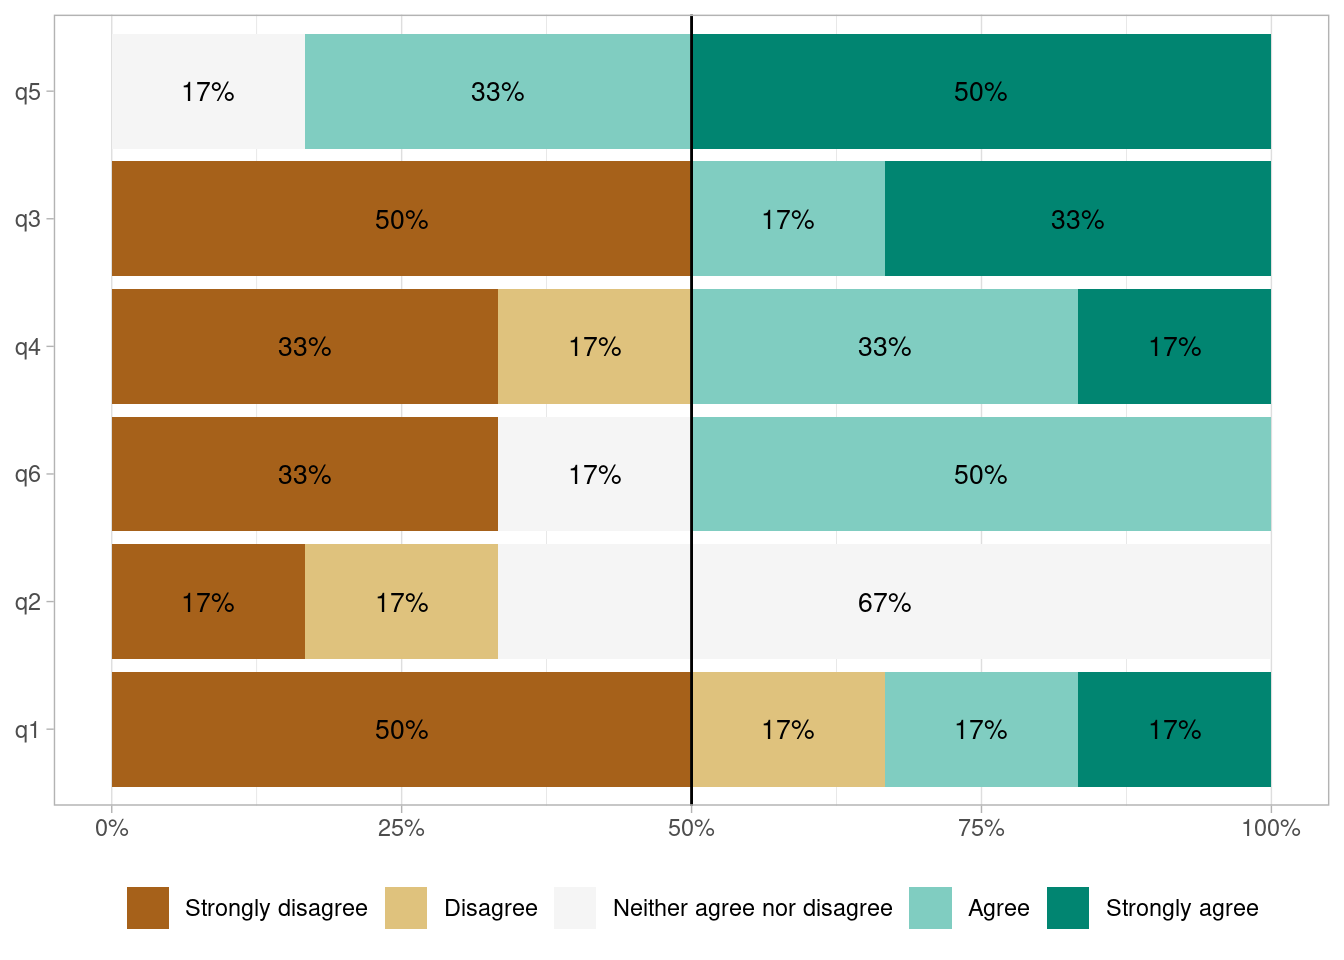

In [ ]:
gglikert(df, sort = "descending", sort_method = "mean")


In [ ]:
df_numeric <- df |>
  mutate(across(everything(), ~ as.numeric(.x)))
df_numeric$expert <- LETTERS[1:6]
df_numeric |> 
  select(-expert) |>
  tbl_summary(type = ~"continuous", statistic = list(all_continuous() ~ "{mean} ({sd})"))
